In [287]:
import numpy as np
from scipy.integrate import solve_ivp
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.constants import N_A
import pybindingcurve as pbc

In [283]:
rtot=1e5
r_ab = 1.25e-8
r_cell = 8e-6
Target_cell_number = 2e5
reaction_volume = (2*math.pi/3)*(r_ab**3)
Ageff = (1/reaction_volume)*(rtot/N_A)*((4*math.pi*r_cell)**2)
assay_volume = 150e-6
print(Ageff)

rtot=1e5
rtot1 = (rtot*Target_cell_number/(N_A))*(1/assay_volume)
print(rtot1)

0.0004102609175392188
2.214052089565129e-10


In [284]:
def model(t, z, Ainit, kon, koff, rtot):

    Ageff = (1/reaction_volume)*(rtot/N_A)*((4*math.pi*r_cell)**2)
    rtot = rtot*Target_cell_number/(N_A*assay_volume)
    A0 = (Ainit - z[0] - z[1])
    r = (rtot - z[0] - 2*z[1])
    k2 = kon*Ageff
    dA1 = 2*kon*r*A0 - koff*z[0] - (k2*z[0]*r/rtot) + 2*koff*z[1]
    dA2 = (k2*z[0]*r/rtot) - 2*koff*z[1]


    return [dA1, dA2]

In [285]:
z0 = [0, 0]
t_end = 60*60
t = np.linspace(0, t_end, 2000)
t_span = [0, t_end]
k1 = 1e5
koff = 1e-4
rtot = 1e5
Ainit=1e-7

z = solve_ivp(model, t_span, z0, method='Radau', t_eval=t, args = (Ainit,k1,koff,rtot))

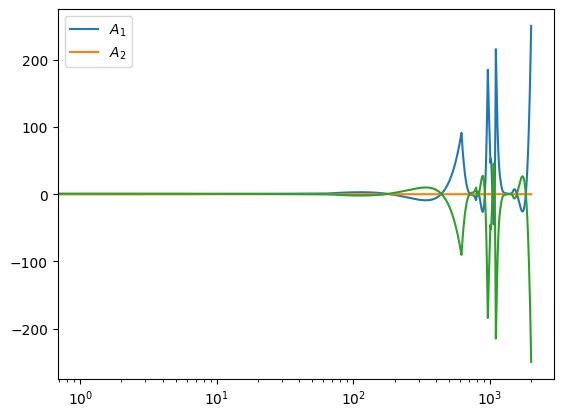

In [286]:
rtot = rtot*Target_cell_number/(N_A*assay_volume)
plt.plot(z.y[0]/rtot, label=r'$A_1$')
plt.plot(z.y[1]/rtot, label=r'$A_2$')
plt.plot((rtot - z.y[0] - 2*z.y[1])/rtot)
plt.plot
plt.legend()
plt.xscale('log')
plt.show()